# 프로젝트 설계

모멘텀이란 사람들의 심리를 반영한 팩터라고 할 수 있다.   
보통 책의 예제에 나오는 모멘텀 전략들은 그 전 시점의 가격을 이용해 구성하거나 (절대모멘텀) ,    
다른 자산의 가격을 이용해 구성했다. (상대모멘텀)   

이 프로젝트느 모멘텀을 사람들의 반응을 직접적으로 반영해서 구성한다면 더 좋은 성과를 얻을 수 있지 않을까? 라는 호기심에서 시작하게 되었다.     
직접적으로 반영하는 방법에는 커뮤니티나, 뉴스와 같이 자산에 대한 글들을 크롤링한 후 이를 이용해서 하는 방법을 생각 중이다.   

이를 구현하기 위한 단계를 나눠보면,    
1. 크롤링 구현하기.
2. 전처리, 이용할 방법 구상하기.
3. 백테스팅 하기.   
4. 시스템화 시키기

 \+ 검색량도 추가해보자

# 크롤링 하기

첫 번째로 어떤 사이트에서 크롤링 할 것인지에 대해 생각해보자. 

전체 주식에 대해서 모멘텀을 정의하는 것은 어려워 보인다. 주식 커뮤니티에 생각보다 종목에 대한 이야기가 별로 없다.    
따라서 차라리 한 종목에 대해 검색한 후 나오는 기사 개수와 같은 것들을 찾는게 더 나을 것 같다.

기간은 매일? 1주 단위? 한달 단위?

가설 : 좋은 뉴스가 많은 회사에 대해 사람들은 긍정적으로 평가하지 않을까 ?

동적프로그래밍 사용하기

In [6]:
from GetNews import *

?get_titles_by_ssl

In [7]:
titles = get_titles_by_ssl(start='2022-06-01', end='2022-10-31', search_name='삼성증권', verbose1=False, verbose2=True)
titles

100


['삼성증권, 상반기 순익 2886억…1년 새 47.9%↓ < 경제 < 기사본문 - 뉴스저널리즘',
 '삼성증권, 2분기 실적 기대치 충족...이익 개선 전망-이베스트證 - 머니투데이',
 '삼성증권, 올 상반기 당기순익 2886억…전년比 47.8% 감소 [증권오늘] - 시사오늘(시사ON)',
 '삼성증권 미국주식 주간거래, 누적거금액 2조원 돌파 - 뉴스저널리즘',
 "삼성증권, 미국 주식 '낮' 거래액 누적 2조 넘었다 - 비즈니스워치",
 '삼성증권, 미국주식 주간거래·누적거래금액 2조원 돌파 - 쿠키뉴스',
 '[Daily Pick 금융] 삼성증권, 대신증권, OK저축은행, 우리카드, 신한카드 ... - 뉴스저널리즘',
 "[단독] 삼성증권 '임원 불법대출'에 이복현 금감원 칼날 겨눈다 - 한겨레",
 '[Daily Pick 금융] KB국민카드, 삼성증권, KB증권, 삼성화재 外 - 뉴스저널리즘',
 '국내 최고 자본시장(Capital Markets) 미디어 - 더벨(thebell)',
 "삼성증권 판매한 'AA'등급 3년 이하 월이자지급식 여전채 인기 - 연합인포맥스",
 '삼성증권, 7%대 높은 배당수익률 기대-BNK證 - 머니투데이',
 '[Daily Pick 금융] 신한카드, 롯데카드, 삼성증권, 신한금융투자, 키움 ... - 뉴스저널리즘',
 '[Daily Pick 금융] 현대커머셜, 삼성증권, 한국투자증권, KB증권, 오월 外 - 뉴스저널리즘',
 '삼성증권, 해외채권 모바일 매매 판매규모 60억 돌파 - 서울파이낸스',
 "삼성증권, 우수고객 맞춤형 서비스 'S라운지' 문 열었다 - 비즈니스워치",
 "삼성증권, 업계최초 모바일 세금관리 서비스 '택스 솔루션' 출시 - 머니투데이",
 "삼성증권, 실전투자대회 'G6 투자 챌린지' 진행 - 컨슈머치",
 "삼성증권, 유망 테마 묶어주는 '주식굴링' 선봬 - 포춘코리아",
 "삼성증권 '다이렉트 IRP' 1조원 달성 - 경기신문",
 '삼성증권, 추석 연휴 미국 주식 주간거래 서비스 운영 - 

# Sentiment score 계산하기

In [5]:
from GetNews import *
from GetSentiment import *
import pickle
from konlpy.tag import *
okt = Okt()
import pandas as pd
from GetNews import *
import warnings
warnings.filterwarnings('ignore')

path = 'C:/Users/Hi/Jupyter/Project/define_momentum_byCrawling/pickle'

def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

with open(path + '/lr_clf.pickle', "rb") as fr:
    lr_clf = pickle.load(fr)
    
with open(path + '/tfidf_vec.pickle', "rb") as fr:
    tfidf_vec = pickle.load(fr)

search_name = '삼성증권'
titles = get_titles_by_ssl(start='2022-06-01', end='2022-10-31', search_name=search_name)
sentiment_score = get_sentiment_score(predict_model=lr_clf, vectorizer_model=tfidf_vec, titles=titles, return_df=False)
print(f"{search_name} 의 sentiment score : {sentiment_score:.3f}")

삼성증권 의 sentiment score : 0.449


In [7]:
search_list = ['삼성증권', '현대중공업', 'LG화학', '셀트리온']
for search_name in search_list:
    titles = get_titles_by_ssl(start='2022-06-01', end='2022-10-31', search_name=search_name)
    sentiment_score = get_sentiment_score(predict_model=lr_clf, vectorizer_model=tfidf_vec, titles=titles, return_df=False)
    print(f"{search_name} 의 sentiment score : {sentiment_score:.3f}")

삼성증권 의 sentiment score : 0.449
현대중공업 의 sentiment score : 1.778
LG화학 의 sentiment score : 0.562
셀트리온 의 sentiment score : 0.149


# 백테스팅 하기

 기본 컨셉은 매 달말에 sentiment score을 계산해서 상위 탑 10개의 자산에 투자한다.

- 전체 종목에 대해서? 너무 많지 않나?    
financedatareader에 동록되어있는 kospi 종목은 943개.    
한 개당 2초정도 걸린다고 했을 때 전체에 대해 찾을 때는 3분정도 걸리겠네.  
너무 오래 걸린다. 시가총액 기준 상위 300개에만 적용해보자. -> 7분걸림.    
300개도 너무 오래걸린다.... 상위 30개에 적용해보자.  

- 상위 10개에 대해 투자하자. (적어도 1은 넘는 것들에 대해)

## 상위 n개 종목 찾기

In [50]:
from GetNews import *
from GetSentiment import *
import pickle
from konlpy.tag import *
okt = Okt()
import pandas as pd
from GetNews import *
import warnings
warnings.filterwarnings('ignore')

path = 'C:/Users/Hi/Jupyter/Project/define_momentum_byCrawling/pickle'

def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

with open(path + '/lr_clf.pickle', "rb") as fr:
    lr_clf = pickle.load(fr)
    
with open(path + '/tfidf_vec.pickle', "rb") as fr:
    tfidf_vec = pickle.load(fr)

In [21]:
sentiment_score_dict= {}
search_list = ['삼성증권', '현대중공업', 'LG화학', '셀트리온']

for search_name in search_list:
    titles = get_titles_by_ssl(start='2022-06-01', end='2022-10-31', search_name=search_name)
    sentiment_score = get_sentiment_score(predict_model=lr_clf, vectorizer_model=tfidf_vec, titles=titles, return_df=False)
    
    sentiment_score_dict[search_name] = sentiment_score

In [22]:
sentiment_score_dict

{'삼성증권': 0.4492753623188406,
 '현대중공업': 1.631578947368421,
 'LG화학': 0.5384615384615384,
 '셀트리온': 0.14942528735632185}

In [30]:
sorted_dict = sorted(sentiment_score_dict.items(), key = lambda item: item[1], reverse = True)
print(sorted_dict)

[('현대중공업', 1.631578947368421), ('LG화학', 0.5384615384615384), ('삼성증권', 0.4492753623188406), ('셀트리온', 0.14942528735632185)]


In [37]:
import FinanceDataReader as fdr
from tqdm import tqdm

df_krx = fdr.StockListing('KRX')

In [33]:
KOSPI_name_list = df_krx[df_krx['Market']=='KOSPI'].iloc[:300, 2].tolist()

In [40]:
sentiment_score_dict= {}
search_list = KOSPI_name_list

for search_name in tqdm(search_list):
    try:
        titles = get_titles_by_ssl(start='2022-06-01', end='2022-10-31', search_name=search_name)
        sentiment_score = get_sentiment_score(predict_model=lr_clf, vectorizer_model=tfidf_vec, titles=titles, return_df=False)
    except:
        sentiment_score = 0
        
    sentiment_score_dict[search_name] = sentiment_score

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [07:29<00:00,  1.50s/it]


In [41]:
sorted_dict = sorted(sentiment_score_dict.items(), key = lambda item: item[1], reverse = True)
print(sorted_dict)

[('후성', 3.5454545454545454), ('현대엘리베이', 2.0), ('현대백화점', 1.9411764705882353), ('HD현대', 1.8571428571428572), ('현대중공업', 1.7777777777777777), ('현대건설', 1.7777777777777777), ('신세계인터내셔날', 1.631578947368421), ('롯데리츠', 1.564102564102564), ('PI첨단소재', 1.3255813953488371), ('바이오노트', 1.3255813953488371), ('현대모비스', 1.2222222222222223), ('HL만도', 1.2222222222222223), ('신한알파리츠', 1.2222222222222223), ('롯데케미칼', 1.173913043478261), ('영원무역홀딩스', 1.1333333333333333), ('신세계', 1.127659574468085), ('SK디스커버리', 1.0833333333333333), ('현대글로비스', 1.0408163265306123), ('동원산업', 1.0408163265306123), ('오리온홀딩스', 1.0408163265306123), ('현대해상', 1.0), ('현대일렉트릭', 1.0), ('현대로템', 0.9607843137254902), ('SK리츠', 0.9607843137254902), ('한국조선해양', 0.9230769230769231), ('현대두산인프라코어', 0.9230769230769231), ('한국콜마', 0.9230769230769231), ('제이알글로벌리츠', 0.9210526315789473), ('현대제철', 0.8867924528301887), ('메리츠증권', 0.8867924528301887), ('롯데지주', 0.8181818181818182), ('현대오토에버', 0.8181818181818182), ('현대건설기계', 0.8181818181818182), ('한샘', 0.818181818

In [43]:
sorted_dict[:10]

[('후성', 3.5454545454545454),
 ('현대엘리베이', 2.0),
 ('현대백화점', 1.9411764705882353),
 ('HD현대', 1.8571428571428572),
 ('현대중공업', 1.7777777777777777),
 ('현대건설', 1.7777777777777777),
 ('신세계인터내셔날', 1.631578947368421),
 ('롯데리츠', 1.564102564102564),
 ('PI첨단소재', 1.3255813953488371),
 ('바이오노트', 1.3255813953488371)]

In [47]:
count = 0
for sentiment_dict in sorted_dict[:10]:
    if sentiment_dict[1] > 1:
        count += 1
count

10

In [48]:
def find_stocks(start, end, search_list, top_n=10):
    """
    predict_model, vectorizer_model : GetStock.py 에 정의되어있는대로 사용.
    start : 조회할 기간 중 시작 날짜 -> Str (ex:2022-06-01),
    end : 조회할 기간 중 끝 날짜 -> Str (ex:2022-12-01),
    top_n : 조회할 상위 n 개 -> Int,
    search_list : 조회할 종목 이름 -> List,
    return : 이름과 감성점수가 키, 벨류로 구성된 dict로, 구성된 리스트 -> List
    
    """
    sentiment_score_dict= {}

    for search_name in search_list:
        try:
            titles = get_titles_by_ssl(start=start, end=end, search_name=search_name)
            sentiment_score = get_sentiment_score(predict_model=predict_model, vectorizer_model=vectorizer_model, titles=titles, return_df=False)
        except:
            sentiment_score = 0

        sentiment_score_dict[search_name] = sentiment_score
        
    sorted_dict_list = sorted(sentiment_score_dict.items(), key = lambda item: item[1], reverse = True)
    sorted_dict_list = sorted_dict_list[:top_n]
    
    # 감성 점수가 1보다 큰 것들만 고르기 위해서
    count = 0
    for sorted_dict in sorted_dict_list[:10]:
        if sorted_dict[1] > 1:
            count += 1
            
    return sorted_dict_list[:count]

In [58]:
KOSPI_name_list = df_krx[df_krx['Market']=='KOSPI']['Name'].tolist()

find_stocks(start='2022-01-01', end='2022-02-01', top_n=10, search_n=30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:54<00:00,  1.81s/it]


[('두산에너빌리티', 2.0303030303030303)]

## close df 만들기

In [60]:
df_krx = fdr.StockListing('KRX')

In [86]:
code_list = df_krx[df_krx['Market']=='KOSPI'].iloc[:, 0].tolist()
name_list = df_krx[df_krx['Market']=='KOSPI'].iloc[:, 2].tolist()

In [110]:
total_df = pd.DataFrame()
total_df.index = pd.date_range(start="2000-1-1", end='2023-01-01')

for code, name in tqdm(zip(code_list, name_list)):
    tmp_df = fdr.DataReader(code)['Close']
    total_df[name] = tmp_df

943it [04:06,  3.83it/s]


In [116]:
total_df = total_df.iloc[:-3]

In [117]:
path = 'C:/Users/Hi/Jupyter/Project/define_momentum_byCrawling/pickle'

with open(path + '/total_df.pickle', "wb") as fw:
    pickle.dump(total_df, fw)

# 백테스팅

for문으로 돌려야할 것 같다.   
매월 말 index를 어떻게 추출할 것인지.

In [9]:
from GetNews import *
from GetSentiment import *
from GetStocks import *
import pickle
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from konlpy.tag import *
okt = Okt()
from tqdm import tqdm

path = 'C:/Users/Hi/Jupyter/Project/define_momentum_byCrawling/pickle'

def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

with open(path + '/lr_clf.pickle', "rb") as fr:
    lr_clf = pickle.load(fr)
    
with open(path + '/tfidf_vec.pickle', "rb") as fr:
    tfidf_vec = pickle.load(fr)
    
with open(path + '/total_df.pickle', "rb") as fr:
    total_df = pickle.load(fr) 
    
# 주말 제거
tmp = total_df.fillna(-1)
tmp['check'] = tmp.sum(axis=1)
weekend_index = tmp[tmp['check'] == -943].index 

total_df = total_df.drop(weekend_index)

return_df = total_df.pct_change()
return_df = return_df.resample('M').last()
return_df = return_df.iloc[:, :30] # 시가총액 기준 상위 30개에 대해 진행
return_df = return_df.iloc[215:] # 5년정도 테스트

In [ ]:
stock_list = []
returns = []

for index, row in return_df.iterrows():
    print(index, end=' ')

    # 전 달에 계산한걸로 수익률 계산
    tmp = row.loc[stock_list].mean()
    returns.append(tmp)
    print(tmp, end=' ')
    
    # 투자할 대상 선정
    start = index.strftime('%Y-%m-01')
    end = index.strftime('%Y-%m-%d')
    
    candidate_stocks = row.dropna().index.tolist() 
    
    result = find_stocks(start=start, end=end, search_list=candidate_stocks, 
            predict_model=lr_clf, vectorizer_model=tfidf_vec, top_n=10)
    stock_list = [x[0] for x in result if x[1] > 0.5] # 감성점수가 0.5가 넘을 때만 투자한다. 
    print(stock_list)

2017-12-31 00:00:00 nan ['카카오', '하나금융지주', '신한지주']
2018-01-31 00:00:00 0.0062149969735638315 []
2018-02-28 00:00:00 nan ['삼성생명', '현대차', '기아', '삼성SDI', 'KB금융', '신한지주']
2018-03-31 00:00:00 -0.0028223272372356703 ['하나금융지주', 'NAVER', '신한지주', '삼성물산']
2018-04-30 00:00:00 0.0028095843346529203 ['KT&G', 'LG화학', '삼성물산']
2018-05-31 00:00:00 0.006988955240537331 ['현대차', '기아', 'LG화학', '현대모비스', 'KB금융']
2018-06-30 00:00:00 0.0011353561782108334 ['기아', '현대모비스', '고려아연', '삼성물산', '삼성생명', 'LG화학']
2018-07-31 00:00:00 0.0011715429209170347 ['기아', '삼성SDI', 'KB금융']
2018-08-31 00:00:00 0.0016164327397765927 ['현대차']
2018-09-30 00:00:00 -0.007662835249042099 ['두산에너빌리티']
2018-10-31 00:00:00 0.018604085603112885 ['삼성물산', '포스코케미칼', '두산에너빌리티', '기아', '삼성생명']
2018-11-30 00:00:00 -0.004412382872285514 ['두산에너빌리티', 'POSCO홀딩스', '고려아연']
2018-12-31 00:00:00 -0.004752261996219698 ['두산에너빌리티', '기아', '현대모비스', '삼성생명', 'LG화학', 'KT&G', 'SK하이닉스']
2019-01-31 00:00:00 -0.014653740137533813 ['두산에너빌리티', '삼성생명', '하나금융지주', '기아']
2019-02-

# 결과 확인

In [22]:
import pickle

path = 'C:/Users/Hi/Jupyter/Project/define_momentum_byCrawling/pickle'


# 전체 종목에 대한 close값을 모아놓은 데이터. 
with open(path + '/total_df.pickle', "rb") as fr:
    total_df = pickle.load(fr) 
    
# 주말 제거
tmp = total_df.fillna(-1)
tmp['check'] = tmp.sum(axis=1)
weekend_index = tmp[tmp['check'] == -943].index 

total_df = total_df.drop(weekend_index)

return_df = total_df.pct_change()
return_df = return_df.resample('M').last()
return_df = return_df.iloc[:, :30] # 시가총액 기준 상위 30개에 대해 진행
return_df = return_df.iloc[215:] # 5년정도 테스트
    
# sentiment score 최소 0.5 이상인 경우에만 , 시가총액기준 상위 30개. 
with open(path + '/result_df.pickle', "rb") as fr:
    result_df = pickle.load(fr) 
    
# sentiment score 최소 1 이상인 경우에만 , 시가총액기준 상위 30개. 
with open(path + '/result_df_2.pickle', "rb") as fr:
    result_df_2 = pickle.load(fr) 
 

## 수익률 확인

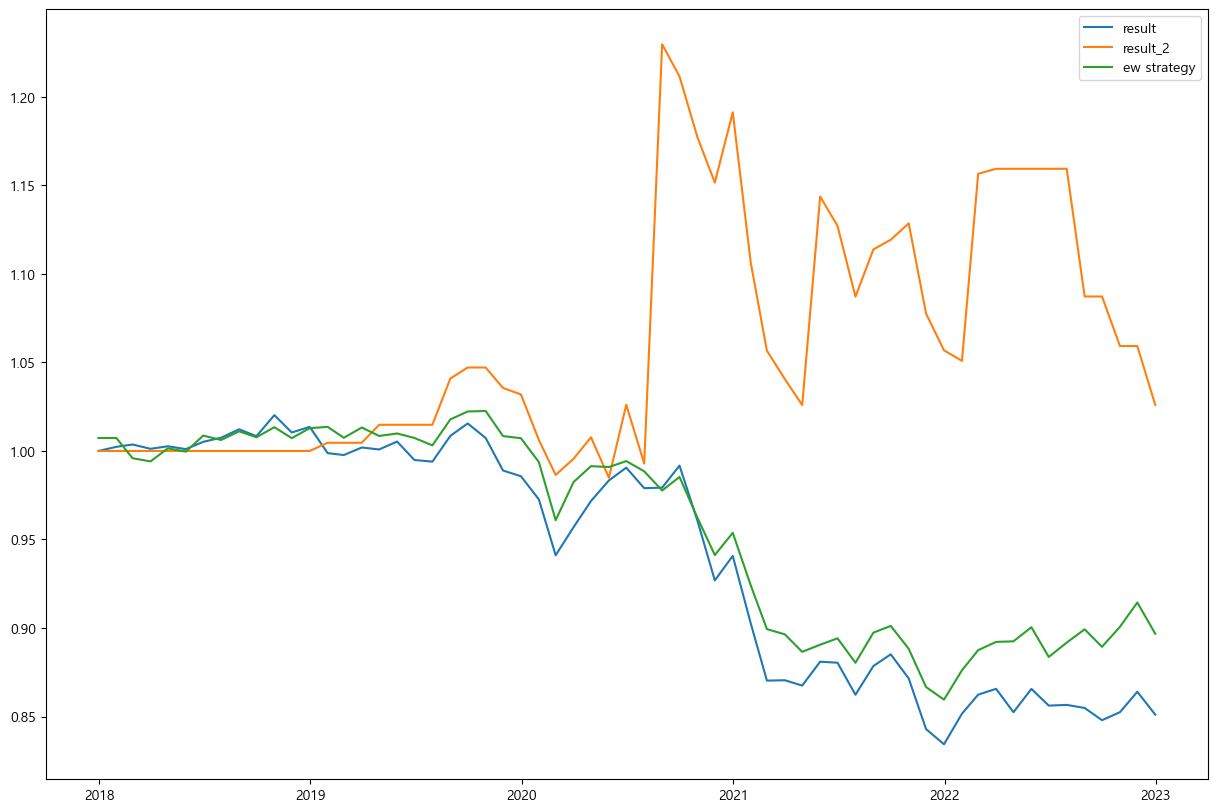

In [23]:
import matplotlib.pyplot as plt

returns = result_df['returns'].fillna(0)
cum_returns = (1 + returns).cumprod()

returns_2 = result_df_2['returns'].fillna(0)
cum_returns_2 = (1 + returns_2).cumprod()

plt.figure(figsize=(15, 10))
plt.plot(cum_returns, label='result')
plt.plot(cum_returns_2, label='result_2')
plt.plot((return_df.fillna(0).mean(axis=1) + 1).cumprod(), label='ew strategy')
plt.legend()

## 개수 확인

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

plt.rc("font", family="Malgun Gothic") #한글폰트설정
plt.rc("axes", unicode_minus=False) #-깨지는거 수정해주기

In [125]:
def plot_count(df, is_pie=False):
    stock_count = []

    n = len(df['invest_stocks'])
    pal = sns.color_palette('Spectral', n)

    for i in range(n):
        stock_count.extend(df['invest_stocks'].iloc[i])
        
    count_dict = dict(Counter(stock_count))
    count_dict = dict(sorted(count_dict.items(), key = lambda item: item[1], reverse = True))
    
    plt.figure(figsize=(15, 10))
    if is_pie:
        plt.pie(labels=count_dict.keys(), x=count_dict.values())
    else:
        plt.bar(count_dict.keys(), count_dict.values())
    plt.xticks(rotation=45)

    plt.show()

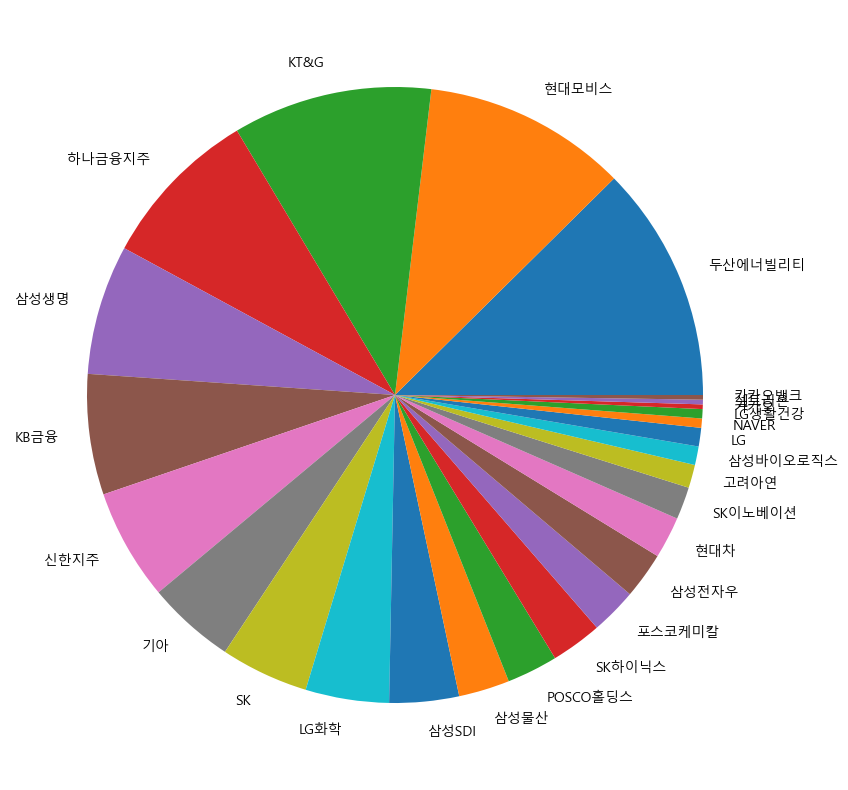

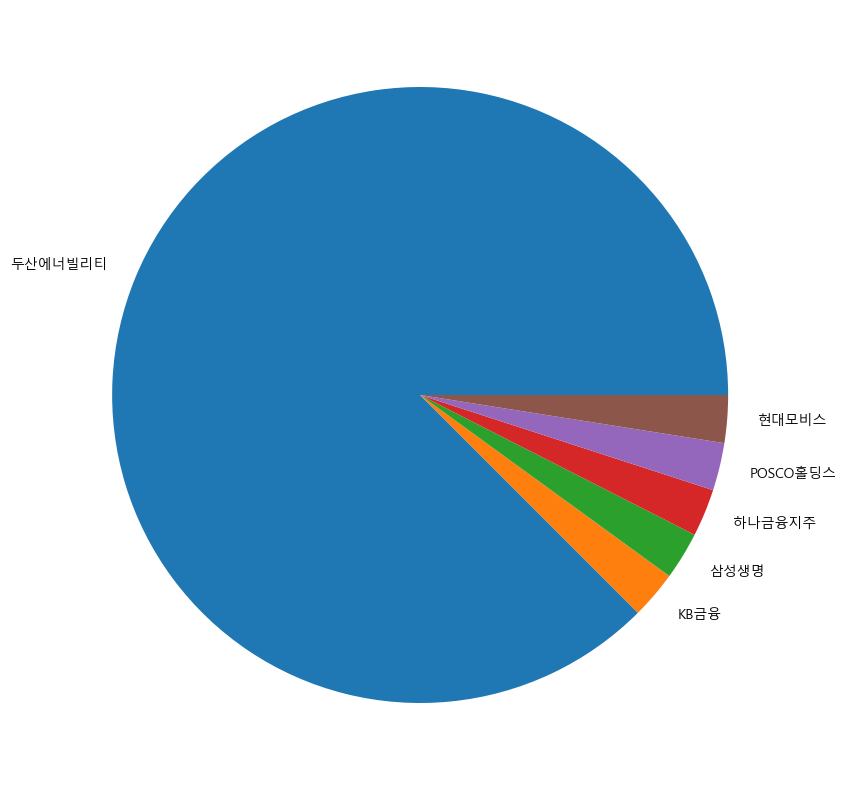

In [126]:
plot_count(result_df, is_pie=True)
plot_count(result_df_2, is_pie=True)

In [24]:
return_dict = return_df.mean(axis=0).to_dict()
return_dict = dict(sorted(return_dict.items(), key = lambda item: item[1], reverse = True))

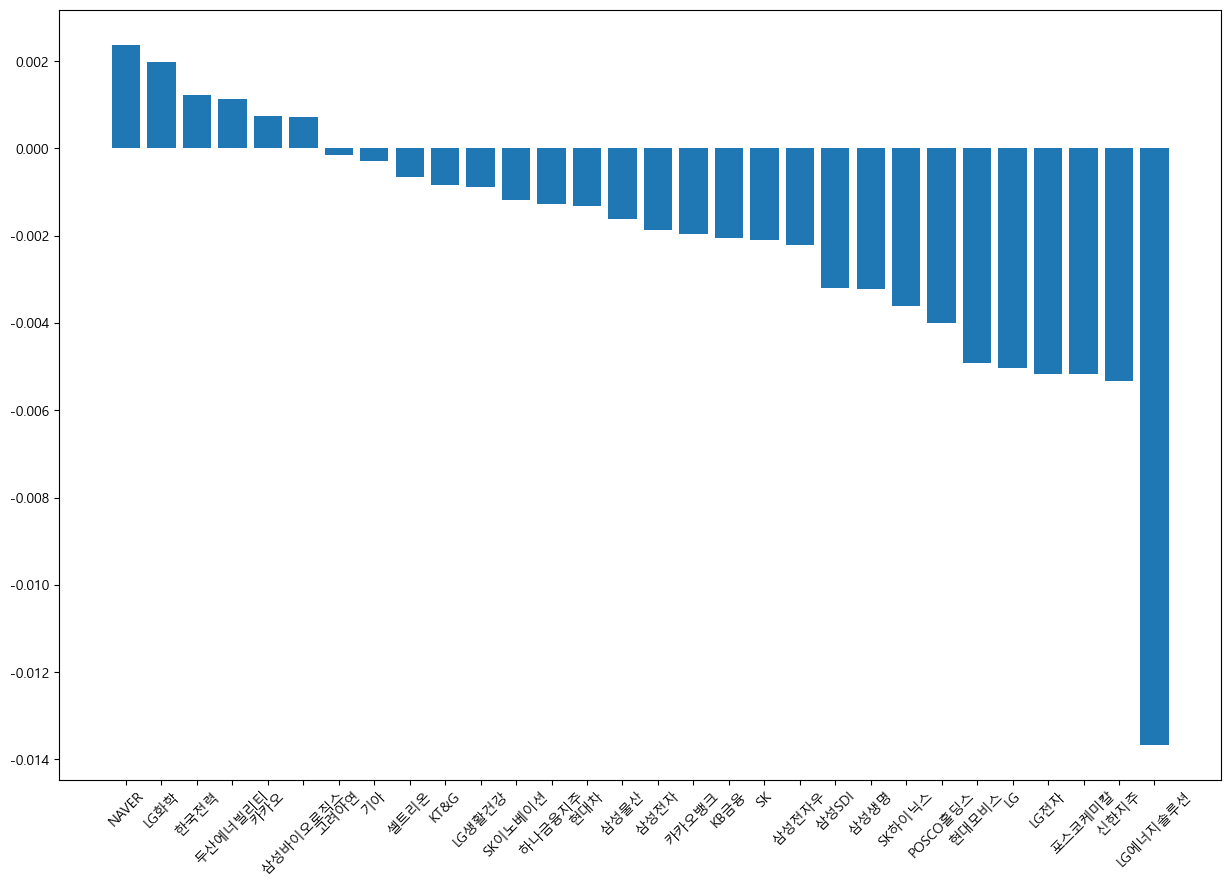

In [25]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)

plt.show()

## 가중치 계산하기

In [188]:
color_list[:30]

['#F0F8FF',
 '#FAEBD7',
 '#00FFFF',
 '#7FFFD4',
 '#F0FFFF',
 '#F5F5DC',
 '#FFE4C4',
 '#000000',
 '#FFEBCD',
 '#0000FF',
 '#8A2BE2',
 '#A52A2A',
 '#DEB887',
 '#5F9EA0',
 '#7FFF00',
 '#D2691E',
 '#FF7F50',
 '#6495ED',
 '#FFF8DC',
 '#DC143C',
 '#00FFFF',
 '#00008B',
 '#008B8B',
 '#B8860B',
 '#A9A9A9',
 '#006400',
 '#BDB76B',
 '#8B008B',
 '#556B2F',
 '#FF8C00']

In [191]:
import pandas as pd

def plot_weight(result_df):
    weight_df = pd.DataFrame()
    weight_df = weight_df.reindex_like(return_df)
    
    for i, stocks in enumerate(result_df['invest_stocks'].tolist()):
        index = weight_df.index[i]

        if len(stocks) >= 1:
            weight_df.loc[index, stocks] = 1 / len(stocks)

    weight_df = weight_df.fillna(0)

    zero_columns = weight_df.columns[weight_df.sum(axis=0) == 0].tolist()
    weight_df = weight_df.drop(zero_columns, axis=1)

    pal = sns.color_palette('Spectral', len(weight_df.columns))

    plt.figure(figsize=(20, 10))
    plt.stackplot(weight_df.index, weight_df.T, labels=weight_df.columns, colors=pal)
    plt.title('Weights')
    plt.xlabel('Date')
    plt.ylabel('Weights')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

    plt.show()

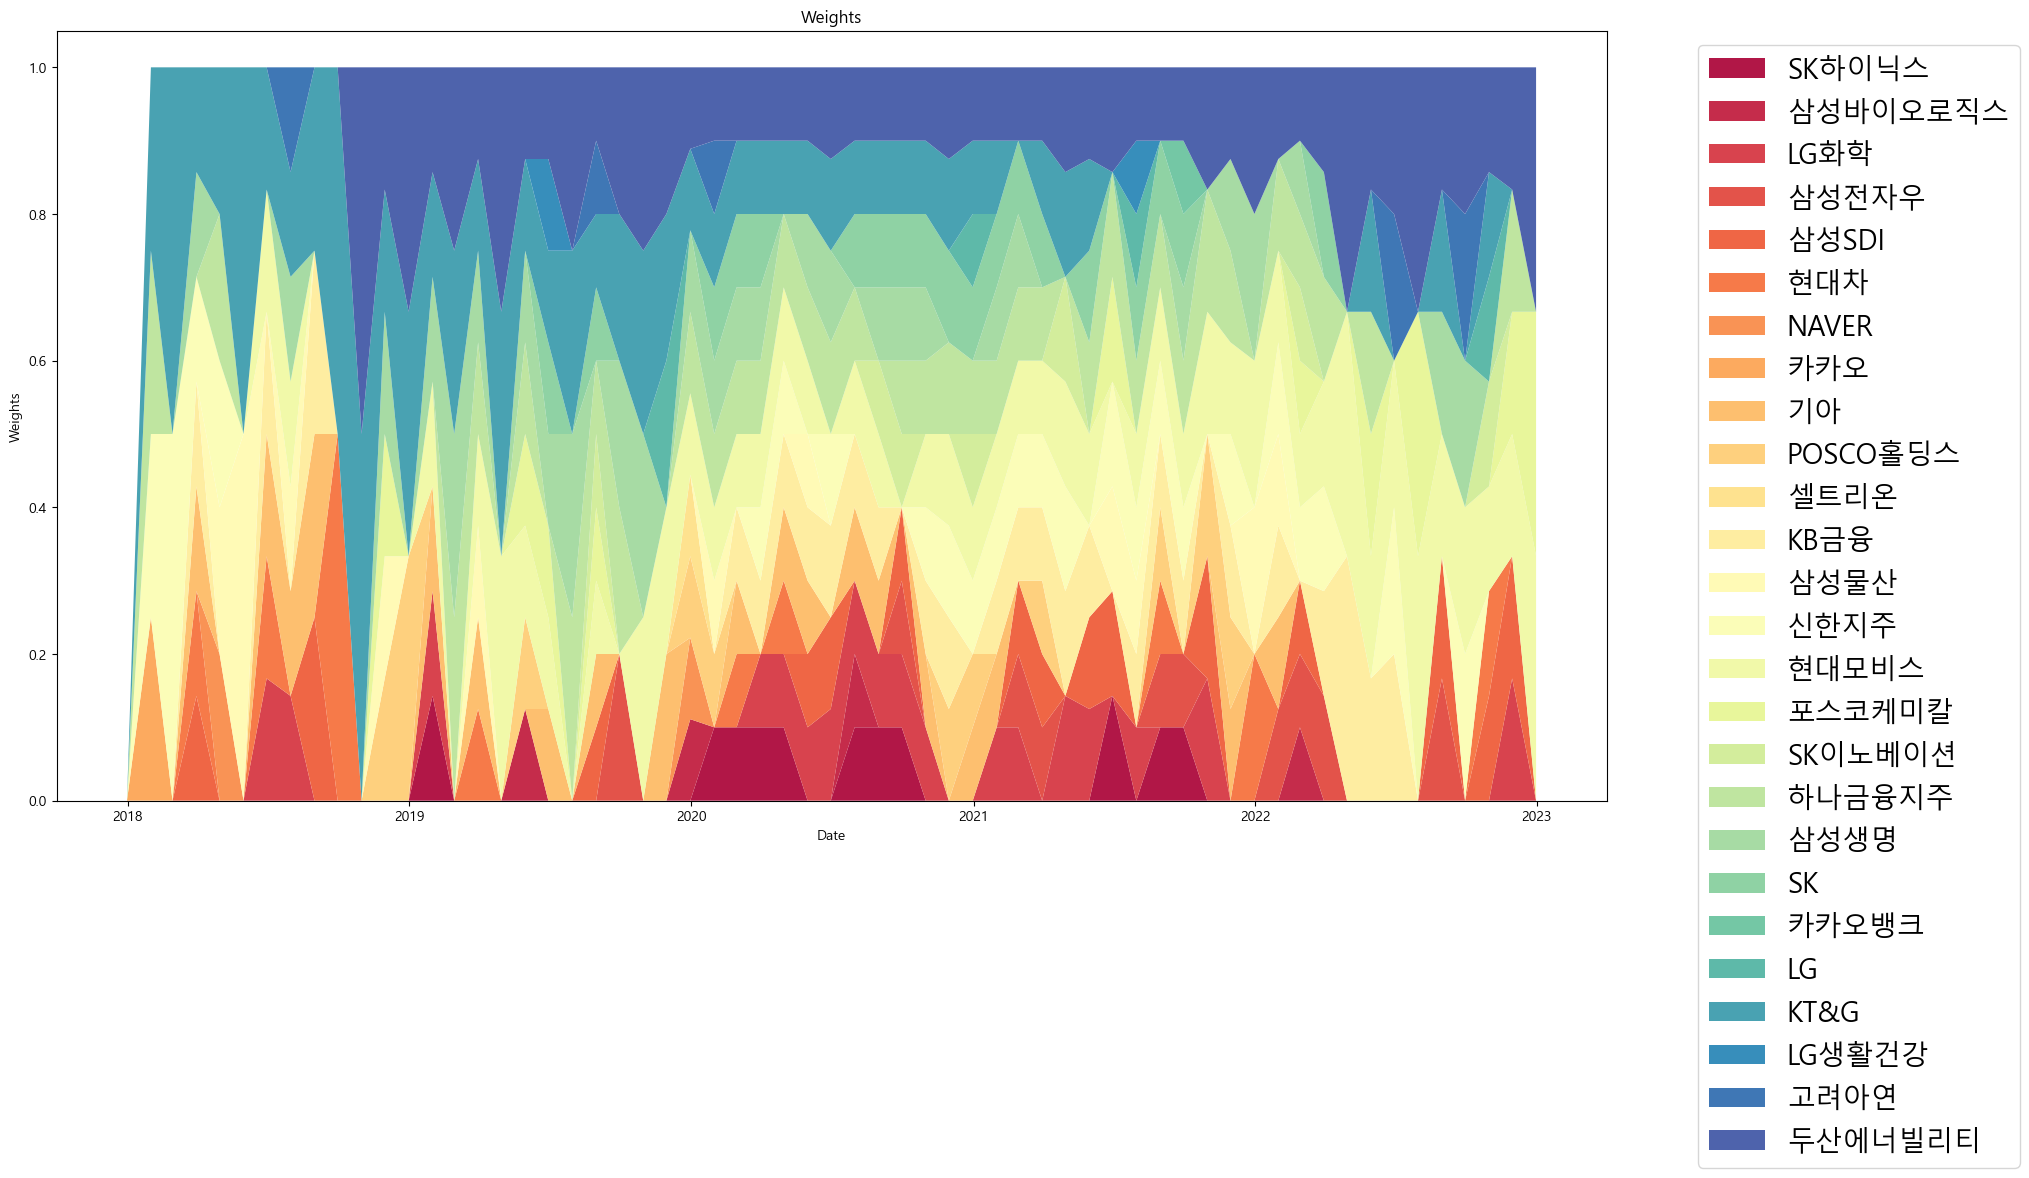

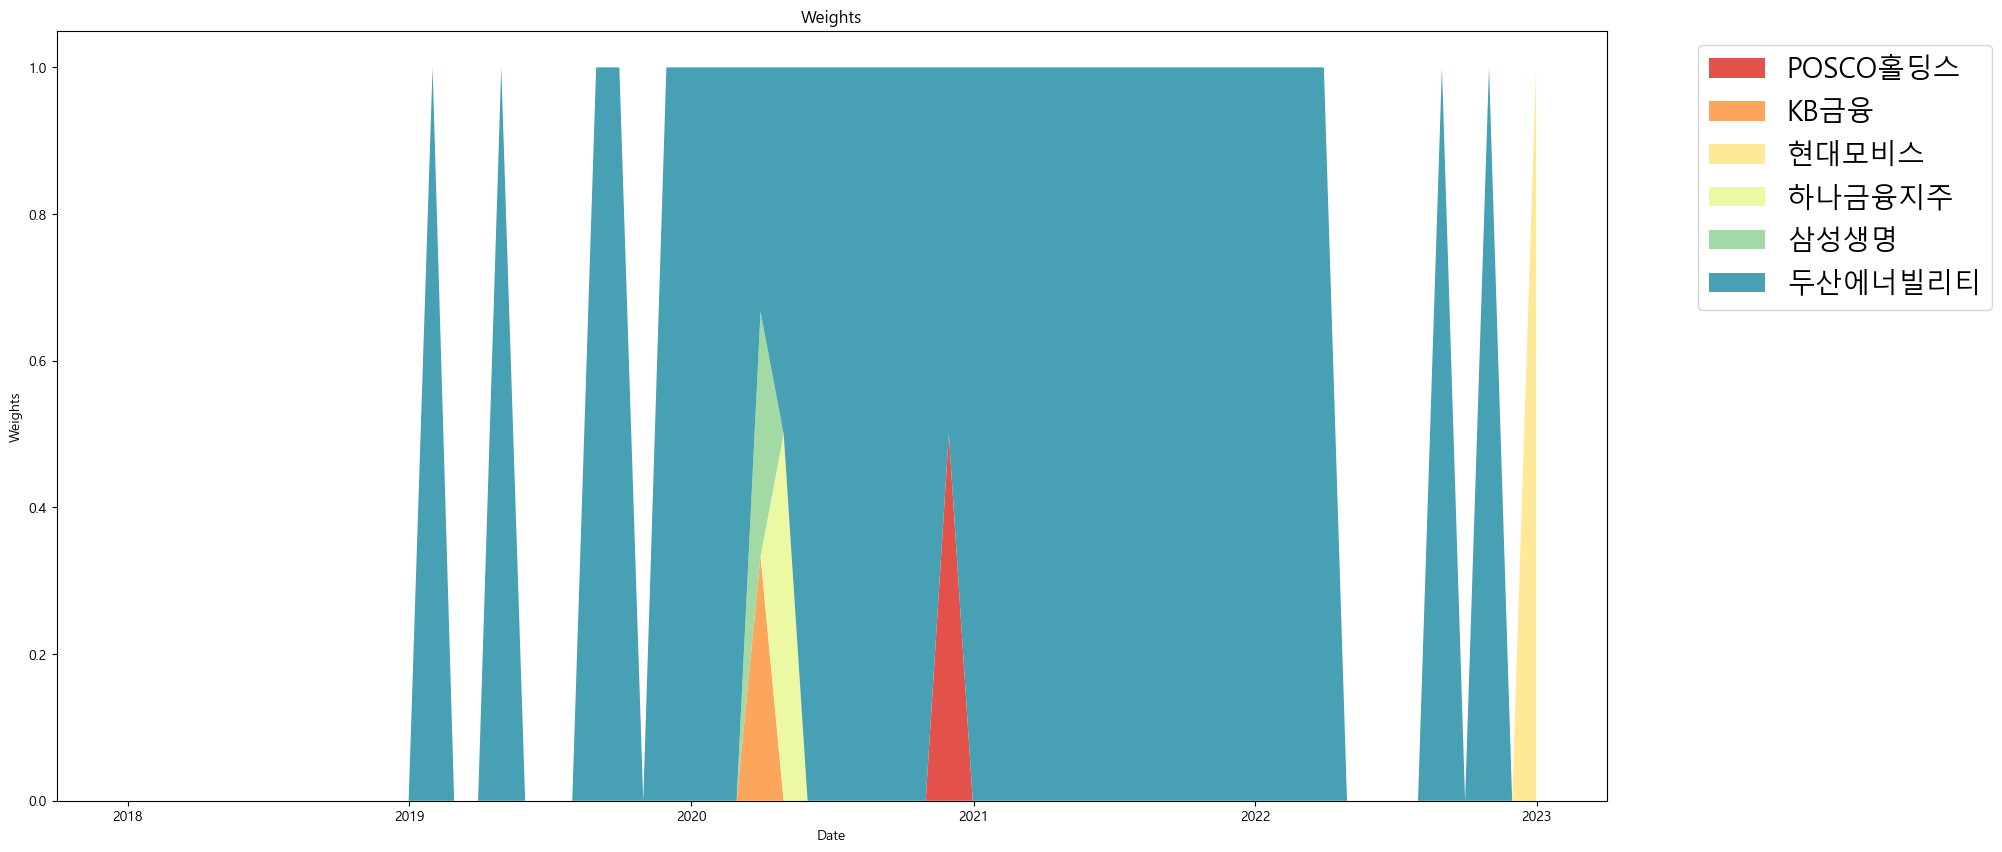

In [192]:
plot_weight(result_df)
plot_weight(result_df_2)

In [145]:
import numpy as np

columns = return_df.columns
max_columns = []

for value in return_df.fillna(0).values:
    index = np.argmax(value)
    max_columns.append(columns[index])

In [160]:
tmp_df = pd.DataFrame()
tmp_df = tmp_df.reindex_like(return_df)
for i, column in enumerate(max_columns):
    index = tmp_df.index[i]
    
    tmp_df.loc[index, column] = 1

tmp_df = tmp_df.fillna(0)

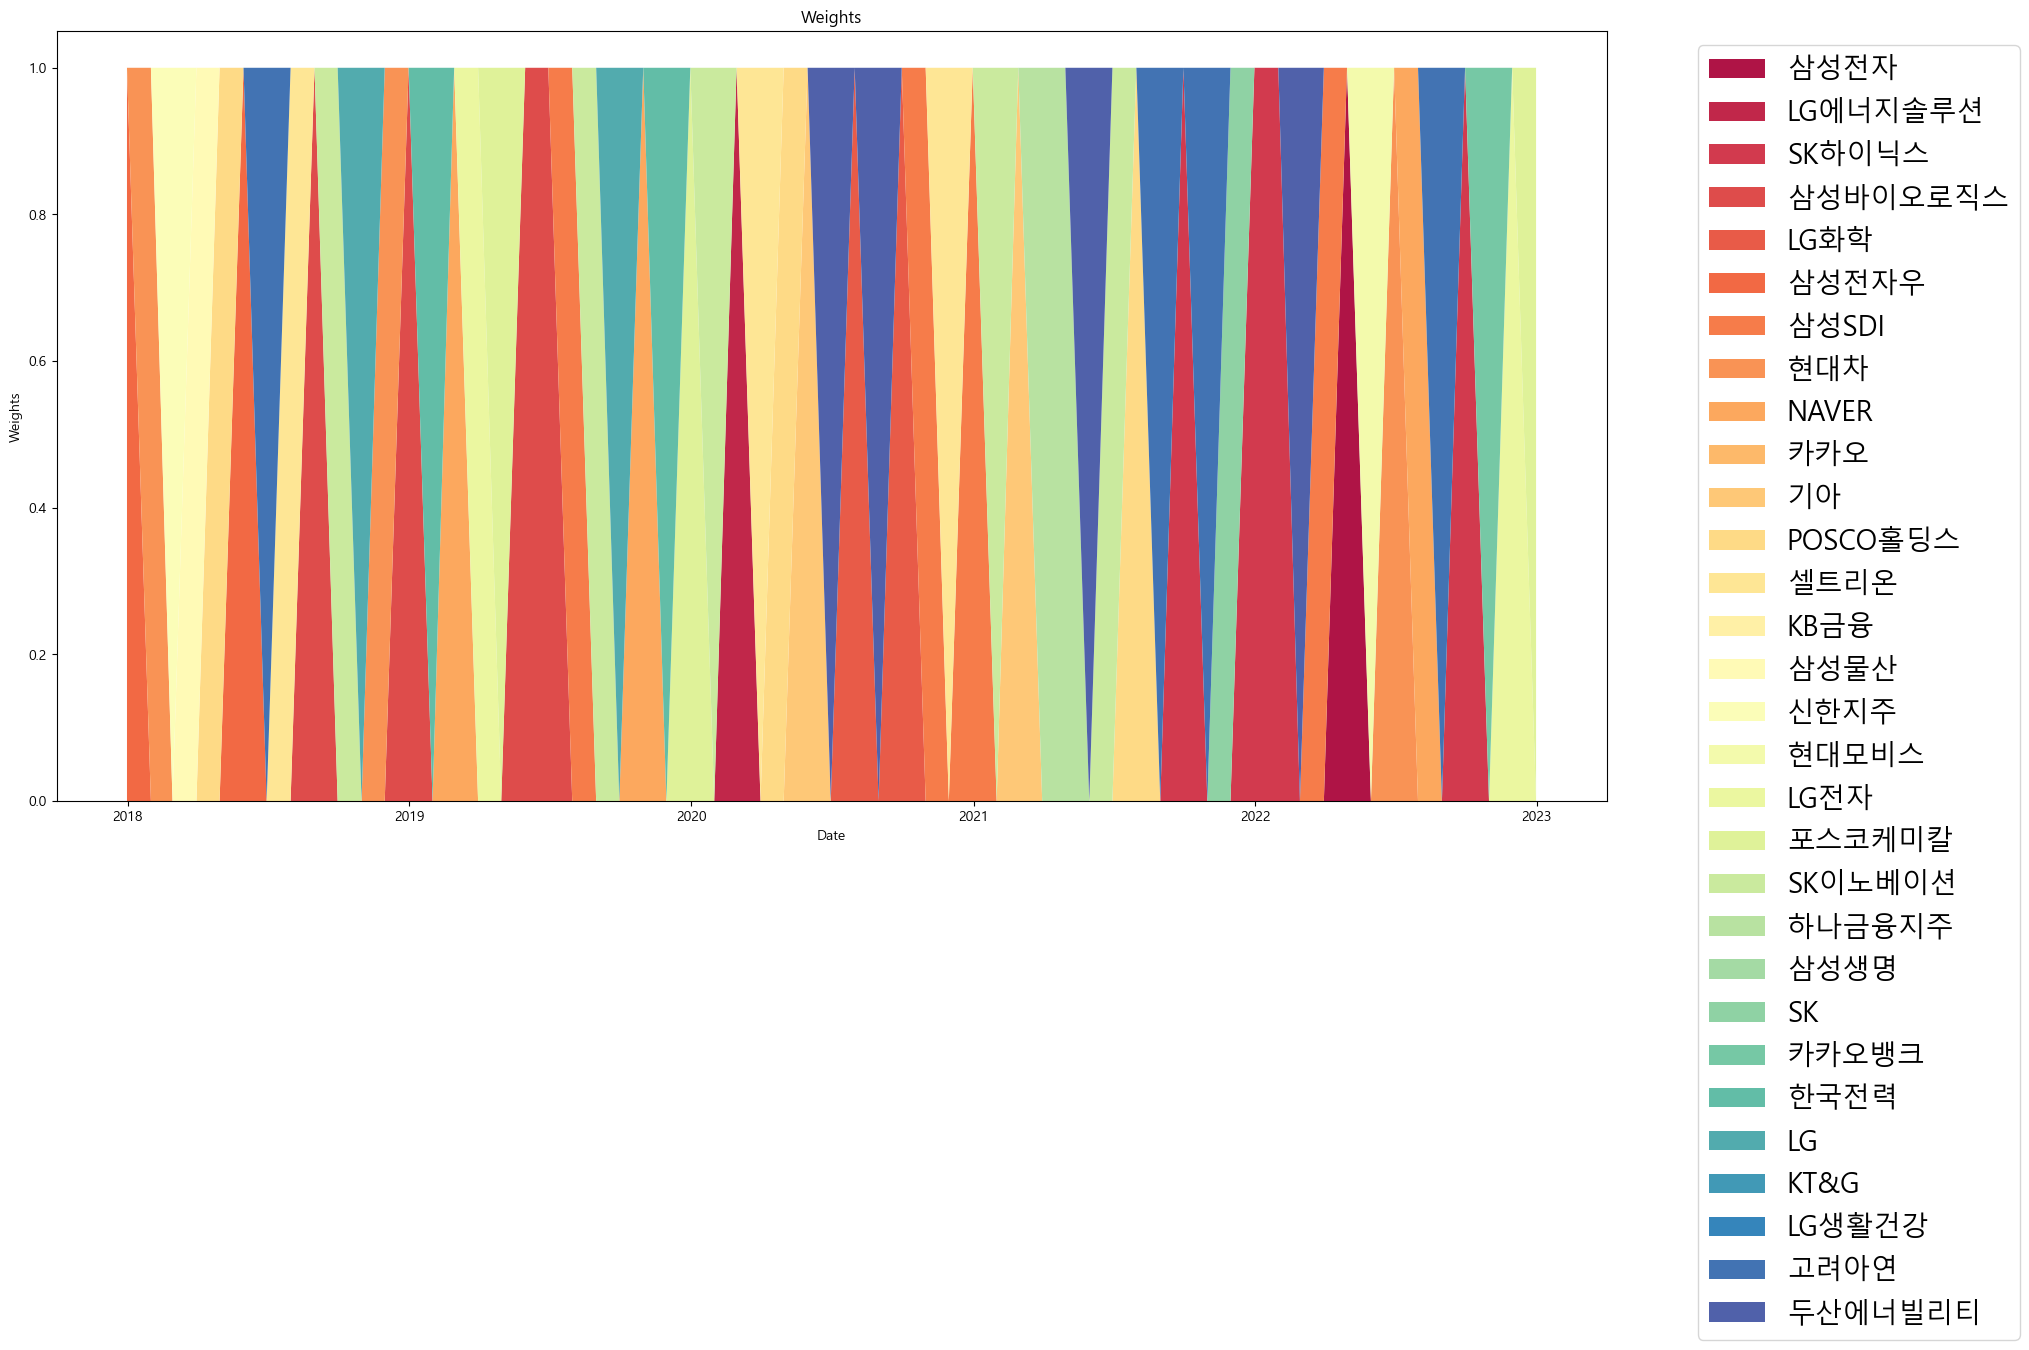

In [161]:
pal = sns.color_palette('Spectral', len(tmp_df.columns))

plt.figure(figsize=(20, 10))
plt.stackplot(tmp_df.index, tmp_df.T, labels=tmp_df.columns, colors=pal)
plt.title('Weights')
plt.xlabel('Date')
plt.ylabel('Weights')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.show()